In [205]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime as dt
# Import and Initialize Sentiment Analyzer
#pip install vaderSentiment==2.5
# from vaderSentiment.vaderSentment import SentimentIntensityAnalyzer
# analyzer = SentimentIntensityAnalyzer()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
analyzer = SentimentIntensityAnalyzer()
# Twitter API Keys
consumer_key = 'SROxajTijhocLMb7r2YTWiaYn'
consumer_secret = 'lZ2BJSbJ0K7rxFOn1GHqKawQtCqyLfvKp8mizeNU3HiKNXQ683'
access_token = '975021481628438528-TxgPO0geJ2lobpUUztEr4zsf4yerD4p'
access_token_secret = 'TqY7bnmOhxOezrTasLxWnekKI9HfPfujkxOudopckr8ZS'

In [90]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [ ]:
bbc_scores = pd.DataFrame({})

In [212]:
# Target User Accounts
target_user = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes")
# Variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
tweet_list=[]
sentiments = []
source_list = []
date_list = []
counter = 1
# Loop through each user
for user in target_user:
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):
        # Get all tweets from home feed
        public_tweets = api.user_timeline(user)
        # Loop through all tweets
        for tweet in public_tweets:
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets = tweet["text"]
            tweets_ago = counter
            createddt = tweet["created_at"]
            # Add each value to the appropriate array
            source_list.append(user)
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            tweet_list.append(tweet)
            date_list.append(createddt)
            
            sentiments.append({"Account": user,
                              "Created Date": createddt,
                              #"Date": tweet["created_at"], 
                              "Compound": compound,
                              "Positive": pos,
                              "Negative": neg,
                              "Neutral": neu,
                              "Tweets Ago": tweets_ago,
                              "Tweet Text": tweet})
            counter = counter + 1
 
 #Commented out printing the lists because the output is large.
#If you need the print, uncomment the code.
#     print("User: %s" % user)
#     print("Compound: %s" % positive_list)
#     print("Positive: %s" % positive_list)
#     print("Neutral: %s" % neutral_list)
#     print("Negative: %s" % negative_list)
#     print(tweet_list)
#Print the Averages - this was printed as a sanity check that the above code works.
    print("")
    print("User: %s" % user)
    print("Compound: %s" % np.mean(positive_list))
    print("Positive: %s" % np.mean(positive_list))
    print("Neutral: %s" % np.mean(neutral_list))
    print("Negative: %s" % np.mean(negative_list))

User: @BBC
Compound: [0.101, 0.0, 0.163, 0.0, 0.185, 0.167, 0.0, 0.091, 0.184, 0.0, 0.0, 0.0, 0.236, 0.0, 0.0, 0.104, 0.0, 0.0, 0.0, 0.134, 0.101, 0.0, 0.163, 0.0, 0.185, 0.167, 0.0, 0.091, 0.184, 0.0, 0.0, 0.0, 0.236, 0.0, 0.0, 0.104, 0.0, 0.0, 0.0, 0.134, 0.101, 0.0, 0.163, 0.0, 0.185, 0.167, 0.0, 0.091, 0.184, 0.0, 0.0, 0.0, 0.236, 0.0, 0.0, 0.104, 0.0, 0.0, 0.0, 0.134, 0.101, 0.0, 0.163, 0.0, 0.185, 0.167, 0.0, 0.091, 0.184, 0.0, 0.0, 0.0, 0.236, 0.0, 0.0, 0.104, 0.0, 0.0, 0.0, 0.134, 0.101, 0.0, 0.163, 0.0, 0.185, 0.167, 0.0, 0.091, 0.184, 0.0, 0.0, 0.0, 0.236, 0.0, 0.0, 0.104, 0.0, 0.0, 0.0, 0.134]
Positive: [0.101, 0.0, 0.163, 0.0, 0.185, 0.167, 0.0, 0.091, 0.184, 0.0, 0.0, 0.0, 0.236, 0.0, 0.0, 0.104, 0.0, 0.0, 0.0, 0.134, 0.101, 0.0, 0.163, 0.0, 0.185, 0.167, 0.0, 0.091, 0.184, 0.0, 0.0, 0.0, 0.236, 0.0, 0.0, 0.104, 0.0, 0.0, 0.0, 0.134, 0.101, 0.0, 0.163, 0.0, 0.185, 0.167, 0.0, 0.091, 0.184, 0.0, 0.0, 0.0, 0.236, 0.0, 0.0, 0.104, 0.0, 0.0, 0.0, 0.134, 0.101, 0.0, 0.163, 0.0,

User: @CBS
Compound: [0.101, 0.0, 0.163, 0.0, 0.185, 0.167, 0.0, 0.091, 0.184, 0.0, 0.0, 0.0, 0.236, 0.0, 0.0, 0.104, 0.0, 0.0, 0.0, 0.134, 0.101, 0.0, 0.163, 0.0, 0.185, 0.167, 0.0, 0.091, 0.184, 0.0, 0.0, 0.0, 0.236, 0.0, 0.0, 0.104, 0.0, 0.0, 0.0, 0.134, 0.101, 0.0, 0.163, 0.0, 0.185, 0.167, 0.0, 0.091, 0.184, 0.0, 0.0, 0.0, 0.236, 0.0, 0.0, 0.104, 0.0, 0.0, 0.0, 0.134, 0.101, 0.0, 0.163, 0.0, 0.185, 0.167, 0.0, 0.091, 0.184, 0.0, 0.0, 0.0, 0.236, 0.0, 0.0, 0.104, 0.0, 0.0, 0.0, 0.134, 0.101, 0.0, 0.163, 0.0, 0.185, 0.167, 0.0, 0.091, 0.184, 0.0, 0.0, 0.0, 0.236, 0.0, 0.0, 0.104, 0.0, 0.0, 0.0, 0.134, 0.157, 0.199, 0.115, 0.209, 0.0, 0.0, 0.333, 0.42, 0.0, 0.194, 0.314, 0.355, 0.0, 0.311, 0.198, 0.0, 0.142, 0.0, 0.174, 0.0, 0.157, 0.199, 0.115, 0.209, 0.0, 0.0, 0.333, 0.42, 0.0, 0.194, 0.314, 0.355, 0.0, 0.311, 0.198, 0.0, 0.142, 0.0, 0.174, 0.0, 0.157, 0.199, 0.115, 0.209, 0.0, 0.0, 0.333, 0.42, 0.0, 0.194, 0.314, 0.355, 0.0, 0.311, 0.198, 0.0, 0.142, 0.0, 0.174, 0.0, 0.157, 0.199,

User: @CNN
Compound: [0.101, 0.0, 0.163, 0.0, 0.185, 0.167, 0.0, 0.091, 0.184, 0.0, 0.0, 0.0, 0.236, 0.0, 0.0, 0.104, 0.0, 0.0, 0.0, 0.134, 0.101, 0.0, 0.163, 0.0, 0.185, 0.167, 0.0, 0.091, 0.184, 0.0, 0.0, 0.0, 0.236, 0.0, 0.0, 0.104, 0.0, 0.0, 0.0, 0.134, 0.101, 0.0, 0.163, 0.0, 0.185, 0.167, 0.0, 0.091, 0.184, 0.0, 0.0, 0.0, 0.236, 0.0, 0.0, 0.104, 0.0, 0.0, 0.0, 0.134, 0.101, 0.0, 0.163, 0.0, 0.185, 0.167, 0.0, 0.091, 0.184, 0.0, 0.0, 0.0, 0.236, 0.0, 0.0, 0.104, 0.0, 0.0, 0.0, 0.134, 0.101, 0.0, 0.163, 0.0, 0.185, 0.167, 0.0, 0.091, 0.184, 0.0, 0.0, 0.0, 0.236, 0.0, 0.0, 0.104, 0.0, 0.0, 0.0, 0.134, 0.157, 0.199, 0.115, 0.209, 0.0, 0.0, 0.333, 0.42, 0.0, 0.194, 0.314, 0.355, 0.0, 0.311, 0.198, 0.0, 0.142, 0.0, 0.174, 0.0, 0.157, 0.199, 0.115, 0.209, 0.0, 0.0, 0.333, 0.42, 0.0, 0.194, 0.314, 0.355, 0.0, 0.311, 0.198, 0.0, 0.142, 0.0, 0.174, 0.0, 0.157, 0.199, 0.115, 0.209, 0.0, 0.0, 0.333, 0.42, 0.0, 0.194, 0.314, 0.355, 0.0, 0.311, 0.198, 0.0, 0.142, 0.0, 0.174, 0.0, 0.157, 0.199,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


User: @nytimes
Compound: [0.101, 0.0, 0.163, 0.0, 0.185, 0.167, 0.0, 0.091, 0.184, 0.0, 0.0, 0.0, 0.236, 0.0, 0.0, 0.104, 0.0, 0.0, 0.0, 0.134, 0.101, 0.0, 0.163, 0.0, 0.185, 0.167, 0.0, 0.091, 0.184, 0.0, 0.0, 0.0, 0.236, 0.0, 0.0, 0.104, 0.0, 0.0, 0.0, 0.134, 0.101, 0.0, 0.163, 0.0, 0.185, 0.167, 0.0, 0.091, 0.184, 0.0, 0.0, 0.0, 0.236, 0.0, 0.0, 0.104, 0.0, 0.0, 0.0, 0.134, 0.101, 0.0, 0.163, 0.0, 0.185, 0.167, 0.0, 0.091, 0.184, 0.0, 0.0, 0.0, 0.236, 0.0, 0.0, 0.104, 0.0, 0.0, 0.0, 0.134, 0.101, 0.0, 0.163, 0.0, 0.185, 0.167, 0.0, 0.091, 0.184, 0.0, 0.0, 0.0, 0.236, 0.0, 0.0, 0.104, 0.0, 0.0, 0.0, 0.134, 0.157, 0.199, 0.115, 0.209, 0.0, 0.0, 0.333, 0.42, 0.0, 0.194, 0.314, 0.355, 0.0, 0.311, 0.198, 0.0, 0.142, 0.0, 0.174, 0.0, 0.157, 0.199, 0.115, 0.209, 0.0, 0.0, 0.333, 0.42, 0.0, 0.194, 0.314, 0.355, 0.0, 0.311, 0.198, 0.0, 0.142, 0.0, 0.174, 0.0, 0.157, 0.199, 0.115, 0.209, 0.0, 0.0, 0.333, 0.42, 0.0, 0.194, 0.314, 0.355, 0.0, 0.311, 0.198, 0.0, 0.142, 0.0, 0.174, 0.0, 0.157, 0.

In [213]:
sentiments_df = pd.DataFrame(sentiments)
sentiments_df.head()

Account  Compound                    Created Date  Negative  Neutral  \
0    @BBC    0.1280  Sun Mar 25 19:44:01 +0000 2018     0.077    0.821   
1    @BBC   -0.7506  Sun Mar 25 19:15:06 +0000 2018     0.286    0.714   
2    @BBC    0.5719  Sun Mar 25 18:40:04 +0000 2018     0.000    0.837   
3    @BBC    0.0000  Sun Mar 25 18:13:03 +0000 2018     0.000    1.000   
4    @BBC    0.5267  Sun Mar 25 17:30:07 +0000 2018     0.000    0.815   

   Positive                                         Tweet Text  Tweets Ago  
0     0.101  {'created_at': 'Sun Mar 25 19:44:01 +0000 2018...           1  
1     0.000  {'created_at': 'Sun Mar 25 19:15:06 +0000 2018...           2  
2     0.163  {'created_at': 'Sun Mar 25 18:40:04 +0000 2018...           3  
3     0.000  {'created_at': 'Sun Mar 25 18:13:03 +0000 2018...           4  
4     0.185  {'created_at': 'Sun Mar 25 17:30:07 +0000 2018...           5

In [214]:
#Export dataframe into csv.
sentiments_df.to_csv("sentiments.csv")

In [109]:
#Read the csv so that I don't have to run the API again for the data.
# data_file = "sentiments.csv"
# sentiments_csv = pd.read_csv(data_file)
#sentiments_csv.head

<h4>Plots</h4>

In [127]:
#Extract a dataframe for each agency.
nytimes_df = sentiments_df[sentiments_df["Account"] == "@nytimes"]
nytimes_df.head()



Account  Compound  Negative  Neutral  Positive  \
400  @nytimes   -0.0772     0.071    0.929     0.000   
401  @nytimes    0.0000     0.000    1.000     0.000   
402  @nytimes    0.0258     0.109    0.778     0.113   
403  @nytimes   -0.5267     0.186    0.750     0.064   
404  @nytimes    0.7506     0.000    0.670     0.330   

                                            Tweet Text  Tweets Ago  
400  RT @nickconfessore: Facebook took out ads in t...         401  
401  Qantas Airways made a giant leap forward in lo...         402  
402  “I hope in the future for some form of reconci...         403  
403  RT @nytopinion: Even if trans issues don’t top...         404  
404  “It’s true — Jared has been a positive influen...         405

In [131]:
cbs_df = sentiments_df[sentiments_df["Account"] == "@CBS"]
cbs_df.head()

Account  Compound  Negative  Neutral  Positive  \
100    @CBS    0.5319     0.062    0.780     0.157   
101    @CBS    0.5399     0.000    0.801     0.199   
102    @CBS   -0.3400     0.185    0.700     0.115   
103    @CBS    0.7003     0.000    0.791     0.209   
104    @CBS    0.0000     0.000    1.000     0.000   

                                            Tweet Text  Tweets Ago  
100  Don’t miss a minute of the action. Stream the ...         101  
101  RT @MomCBS: That's a wrap on the #Mom panel at...         102  
102  RT @MomCBS: A fan just commented that #Mom hel...         103  
103  RT @MomCBS: "Go out for it anyway. If you're g...         104  
104  RT @MomCBS: Mom Co-Creator @GemmaRBaker just p...         105

In [135]:
cnn_df = sentiments_df[sentiments_df["Account"] == "@CNN"]
cnn_df.head()

Account  Compound  Negative  Neutral  Positive  \
200    @CNN    0.5106     0.000    0.845     0.155   
201    @CNN    0.7469     0.000    0.586     0.414   
202    @CNN   -0.4939     0.225    0.775     0.000   
203    @CNN    0.0000     0.000    1.000     0.000   
204    @CNN   -0.5267     0.167    0.833     0.000   

                                            Tweet Text  Tweets Ago  
200  A driver's dramatic rescue from his SUV was ca...         201  
201  The marching students wowed this security mom ...         202  
202  Why the Stormy Daniels interview should scare ...         203  
203  A day after March for Our Lives, the Pope urge...         204  
204  "(President Trump) is either lying or he is co...         205

In [137]:
fox_df = sentiments_df[sentiments_df["Account"] == "@FoxNews"]
fox_df.head()

Account  Compound  Negative  Neutral  Positive  \
300  @FoxNews    0.8772     0.000    0.614     0.386   
301  @FoxNews   -0.1531     0.078    0.922     0.000   
302  @FoxNews    0.0000     0.000    1.000     0.000   
303  @FoxNews   -0.6969     0.200    0.800     0.000   
304  @FoxNews   -0.6908     0.251    0.749     0.000   

                                            Tweet Text  Tweets Ago  
300  .@stevenmnuchin1: "This is a president that ab...         301  
301  .@DevinNunes: "We also found no collusion betw...         302  
302  On "Cavuto Live," @cvpayne gave his take on th...         303  
303  .@newtgingrich: "There are five cities in Amer...         304  
304  Drunk man steals beef jerky from 7-Eleven, bre...         305

In [140]:
bbc_df = sentiments_df[sentiments_df["Account"] == "@BBC"]
bbc_df.head()

Account  Compound  Negative  Neutral  Positive  \
0    @BBC    0.5719       0.0    0.837     0.163   
1    @BBC    0.0000       0.0    1.000     0.000   
2    @BBC    0.5267       0.0    0.815     0.185   
3    @BBC    0.4588       0.0    0.833     0.167   
4    @BBC    0.0000       0.0    1.000     0.000   

                                          Tweet Text  Tweets Ago  
0  Tonight, @mcgregor_ewan and @McgColin celebrat...           1  
1  The first ever statue of David Bowie has been ...           2  
2  When you're enjoying being single and people j...           3  
3  🇺🇸🏝🇬🇧 Welcome to Tangier Island, the tiny US i...           4  
4  💬 We could listen to him speak all day. \n\n📽 ...           5

In [207]:
# Create date format
date = dt.date.today
date = dt.datetime.today().strftime("%m/%d/%Y")
date

'03/25/2018'

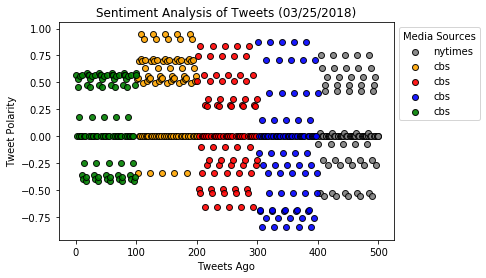

In [226]:
plt.scatter(x=nytimes_df["Tweets Ago"],
           y=nytimes_df["Compound"],
           marker='o', facecolors='grey', edgecolors="black",
           alpha=0.9, label="nytimes")

plt.scatter(x=cbs_df["Tweets Ago"],
           y=cbs_df["Compound"],
           marker='o', facecolors='orange', edgecolors="black",
           alpha=0.9, label="cbs")

plt.scatter(x=cnn_df["Tweets Ago"],
           y=cnn_df["Compound"],
           marker='o', facecolors='red', edgecolors="black",
           alpha=0.9, label="cbs")

plt.scatter(x=fox_df["Tweets Ago"],
           y=fox_df["Compound"],
           marker='o', facecolors='blue', edgecolors="black",
           alpha=0.9, label="cbs")

plt.scatter(x=bbc_df["Tweets Ago"],
           y=bbc_df["Compound"],
           marker='o', facecolors='green', edgecolors="black",
           alpha=0.9, label="cbs")
#plt.title("Sentiment Analysis of Tweets (%s) % (time.strftime("%x")))
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')
plt.title('Sentiment Analysis of Tweets ('+ date +")")
#plt.title("Sentiment Analysis of Tweets")
#plt.legend((a,b,c,d,e),('@BBC', '@CBS','@CNN', '@FoxNews', '@nytimes'),numpoints=1, loc='upper right', ncol=1, fontsize=8)
plt.legend(('@nytimes', '@CBS','@BBC', '@CNN', '@FoxNews', ),numpoints=1, loc='upper right', ncol=1, fontsize=8,  title="Media Sources", fancybox=True)
lgd = plt.legend(bbox_to_anchor=(1,1), title = "Media Sources")
plt.savefig('Sentiment_scatter_plot.png')
plt.show()

In [211]:
#Store average compound scores into dataframe.
avgcompound = round(sentiments_df.groupby(["Account"]).mean()["Compound"],2)
avgcomp = pd.DataFrame(avgcompound)
avgcompound.head()
#avgcomp.head()

Account
@BBC        0.13
@CBS        0.38
@CNN        0.05
@FoxNews   -0.11
@nytimes    0.06
Name: Compound, dtype: float64

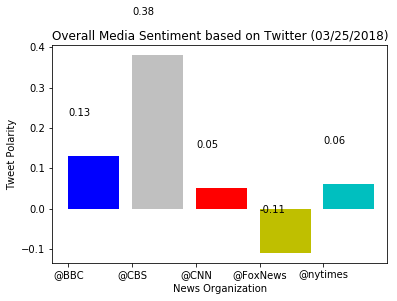

In [216]:
x_axis = np.arange(len(avgcompound))
xlabels = avgcompound.index
#xlabels = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"]
count = 0
for compound in avgcompound:
    plt.text(count, compound+0.1, str(round(compound,2)))
    count = count + 1
#avgcompound is a list of the the  averages of the compounds for each media agency
plt.bar(x_axis, avgcompound, tick_label = xlabels, color=["b", "silver", "r", "y", "c"], align="edge")
#tick_locations = [value+0.1 for value in x_axis]
#plt.xticks(tick_locations, avgcompound)
plt.xlim(-0.25, len(x_axis))
#plt.ylim(0, max(avgcompound)+0.4)
#plt.text('hi')
#plt.bar(x_axis, avgcompound, color='b', alpha=0.5, align="edge")
#plt.gca().invert_xaxis()
#plt.title("Overall Sentiment")
plt.title('Overall Media Sentiment based on Twitter ('+ date +")")
plt.xlabel("News Organization")
plt.ylabel("Tweet Polarity")
plt.savefig('Sentiment_barchart.png')
plt.show()

<h3>Testing</h3>

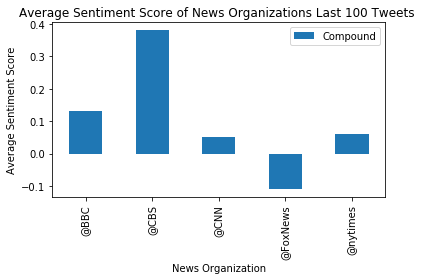

In [151]:
#Simple Bar Graph
avgcomp.plot(kind='bar')
plt.title('Average Sentiment Score of News Organizations Last 100 Tweets ')
plt.xlabel('News Organization')
plt.ylabel('Average Sentiment Score')
#plt.savefig('Sentiment_AvgBar.png')
plt.tight_layout()
plt.show()

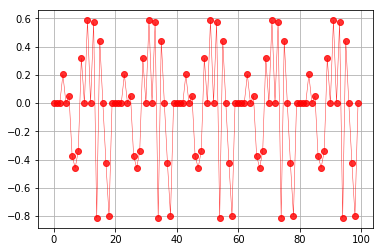

In [45]:
# plt.scatter(compound_df["@BBC"],
#             compound_df["@CBS"])
x = np.arange(100,0,-1)
# a = plt.scatter(x, compound_df["@BBC"])
# b = plt.scatter(x, compound_df["@CBS"])
# c = plt.scatter(x, compound_df["@CNN"])
# d = plt.scatter(x, compound_df["@FoxNews"])
# e = plt.scatter(x, compound_df["@nytimes"])
#plt.title("Sentiment Analysis of All Tweets")

plt.plot(np.arange(len(compound_df["@BBC"])),
         compound_df["@BBC"], marker="o", linewidth=0.5, color = "red",
         alpha=0.8)

# plt.plot(np.arange(len(compound_df["@CBS"])),
#          compound_df["@CBS"], marker="o", linewidth=0.5, color = "orange",
#          alpha=0.8)

# # Incorporate the other graph properties
#plt.title("Sentiment Analysis of Tweets (%s) for %s" % (time.strftime("%x"), target_user))

#plt.ylabel("Wind Speed (mph)")
#plt.axvline(0, color = 'black', alpha = .25, label = 'Equator')
#plt.text(1,30,'Equator',rotation=90)
#plt.ylim(-5,40)
#plt.xlabel("Latitude")
#plt.xlim(-60,90)
plt.grid(True)
#plt.savefig("WeatherPyGraphs/LatitudeVsWindSpeed.png")
plt.show()

In [217]:
# Target User Account - Used for testing purposes.
#Commented out this code and not displaying output because output is too long.
#If this needs to be used, uncomment it out.
# target_user = "@BBC"

# # Counter
# counter = 1

# # Loop through 5 pages of tweets (total 100 tweets)
# for x in range(5):

#     # Get all tweets from home feed
#     public_tweets = api.user_timeline(target_user)

#     # Loop through all tweets
#     for tweet in public_tweets:

#         # Utilize JSON dumps to generate a pretty-printed json
#         # print(json.dumps(
#         #     tweet, sort_keys=True, indent=4, separators=(',', ': ')))

#         # Print Tweets
#         print("Tweet %s: %s" % (counter, tweet["text"]))

#         # Add to Counter
#         counter = counter + 1

In [218]:
# # Target User Account - used BBC for testing
# #Commented out this code and not displaying output because output is too long.
# #If this needs to be used, uncomment it out.
# target_user = "@BBC"

# # Counter
# counter = 1

# # Loop through 5 pages of tweets (total 100 tweets)
# for x in range(5):

#     # Get all tweets from home feed
#     public_tweets = api.user_timeline(target_user)

#     # Loop through all tweets
#     for tweet in public_tweets:

#         # Utilize JSON dumps to generate a pretty-printed json
#         # print(json.dumps(
#         #     tweet, sort_keys=True, indent=4, separators=(',', ': ')))
        
#         # Print Tweets
# #         print("Tweet %s: %s" % (counter, tweet["text"]))

# #         # Add to Counter
# #         counter = counter + 1
#         # Run analysis
#         compound = analyzer.polarity_scores(tweet["text"])["compound"]
#         pos = analyzer.polarity_scores(tweet["text"])["pos"]
#         neu = analyzer.polarity_scores(tweet["text"])["neu"]
#         neg = analyzer.polarity_scores(tweet["text"])["neg"]


#         # Print Analysis
#         print(tweet["text"])
#         print("Compound Score: %s" % compound)
#         print("Positive Score: %s" % pos)
#         print("Neutral Score: %s" % neu)
#         print("Negative Score: %s" % neg)
